In [3]:
from analize import *
import matplotlib.pyplot as plt

# Sequential algorithm

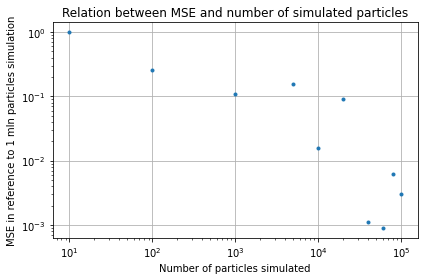

In [50]:
local = prepare_input("../dumps/local__local__local_whisk_1_worker_10-100k_samples.dump", 0, 500, "how_many_workers")
plot_mse(local, "how_many_samples")
#plt.legend()
plt.title("Relation between MSE and number of simulated particles")
plt.xlabel("Number of particles simulated")
plt.ylabel("MSE in reference to 1 mln particles simulation")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.tight_layout()
plt.savefig("local_mse.png", dpi=300, facecolor='w', bbox_inches='tight')

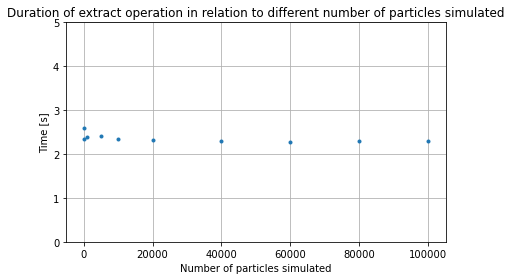

In [51]:
local["metrics.makespan.extracting_and_reducing"] = local["metrics.makespan.extracting_and_reducing"]-3
plot_phases_makespan_vs_params(local, "how_many_samples", ["extracting_and_reducing"], ["extract"])
plt.title("Duration of extract operation in relation to different number of particles simulated")
plt.xlabel("Number of particles simulated")
plt.ylabel("Time [s]")
plt.grid()
plt.ylim([0, 5])
plt.tight_layout()
plt.savefig("local_extract.png", dpi=300, facecolor='w', bbox_inches='tight')

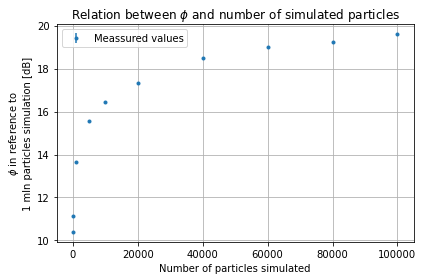

In [5]:
plot_psnr(local, "how_many_samples", "Meassured values")
plt.legend()
plt.title(r"Relation between $\phi$ and number of simulated particles")
plt.xlabel("Number of particles simulated")
plt.ylabel(r"$\phi$ in reference to" "\n1 mln particles simulation [dB]")
plt.tight_layout()
plt.grid()
plt.savefig("local_psnr.png", dpi=300, facecolor='w', bbox_inches='tight')

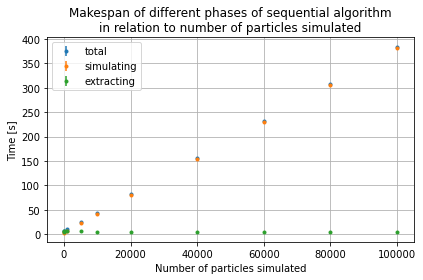

In [6]:
plot_phases_makespan_vs_params(local, "how_many_samples", ["total", "simulating", "extracting_and_reducing"], ["total", "simulating", "extracting"])
plt.legend()
plt.title("Makespan of different phases of sequential algorithm\nin relation to number of particles simulated")
plt.xlabel("Number of particles simulated")
plt.ylabel(r"Time [s]")
plt.tight_layout()
plt.grid()
plt.savefig("local_makespan.png", dpi=300, facecolor='w', bbox_inches='tight')

# First algorithm

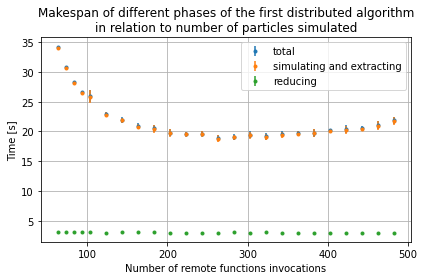

In [7]:
first = prepare_input("../dumps/best_simple_big.dump", 0, 500, "how_many_workers")

plot_phases_makespan_vs_params(first, "how_many_workers", ["total", "simulating_and_extracting", "reducing"], ["total", "simulating and extracting", "reducing"])
plt.legend()
plt.title("Makespan of different phases of the first distributed algorithm\nin relation to number of particles simulated")
plt.xlabel("Number of remote functions invocations")
plt.ylabel(r"Time [s]")
plt.tight_layout()
plt.grid()
plt.savefig("first_makespan.png", dpi=300, facecolor='w', bbox_inches='tight')

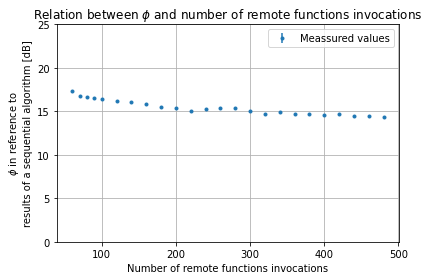

In [8]:
plot_psnr(first, "how_many_workers", "Meassured values")
plt.legend()
plt.title(r"Relation between $\phi$ and number of remote functions invocations")
plt.xlabel("Number of remote functions invocations")
plt.ylabel(r"$\phi$ in reference to" "\nresults of a sequential algorithm [dB]")
plt.tight_layout()
plt.ylim([0, 25])
plt.grid()
plt.savefig("first_psnr.png", dpi=300, facecolor='w', bbox_inches='tight')

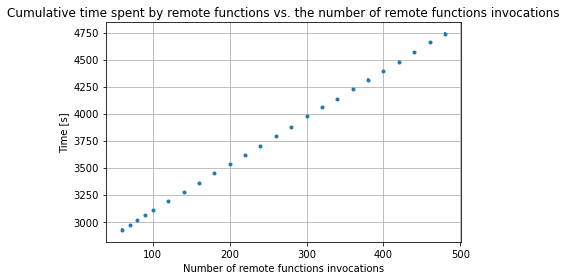

In [9]:
plot_all_cumulative_time(first, "how_many_workers", "")
plt.ylabel("Time [s]")
plt.xlabel("Number of remote functions invocations")
plt.title("Cumulative time spent by remote functions vs. the number of remote functions invocations")
plt.tight_layout()
plt.grid()
plt.savefig("first_cumulative.png", dpi=300, facecolor='w', bbox_inches='tight')

## Second algorithm

In [52]:
persistent = prepare_input("../dumps/persistent2.dump", 0, 500, "how_many_workers")
persistent_reduce_when_2 = persistent[persistent["params.reduce_when"]==2]
persistent_reduce_when_3 = persistent[persistent["params.reduce_when"]==3]
persistent_reduce_when_5 = persistent[persistent["params.reduce_when"]==5]

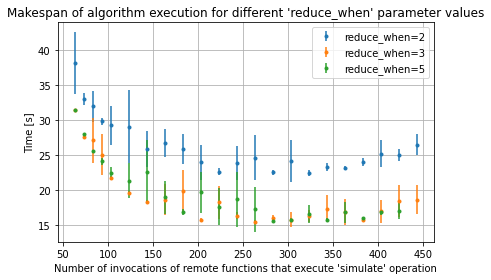

In [12]:
plot_phases_makespan_vs_params(persistent_reduce_when_2, "how_many_workers", ["total"], ["reduce_when=2"])
plot_phases_makespan_vs_params(persistent_reduce_when_3, "how_many_workers", ["total"], ["reduce_when=3"])
plot_phases_makespan_vs_params(persistent_reduce_when_5, "how_many_workers", ["total"], ["reduce_when=5"])
plt.title("Makespan of algorithm execution for different 'reduce_when' parameter values")
plt.legend()
plt.xlabel("Number of invocations of remote functions that execute 'simulate' operation")
plt.ylabel("Time [s]")
plt.grid()
plt.tight_layout()
plt.savefig("second_makespan.png", dpi=300, facecolor='w', bbox_inches='tight')

C:\Users\lukas\Downloads\magisterka_final\shieldhit_lambda\metrics\analize_time.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["execution_time_sum"] = results.apply(


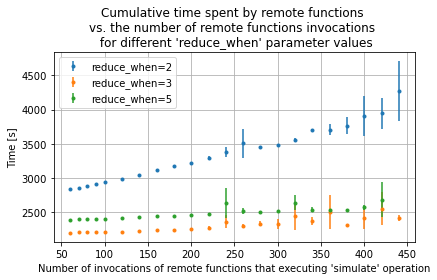

In [13]:
plot_all_cumulative_time(persistent_reduce_when_2, "how_many_workers", "reduce_when=2")
plot_all_cumulative_time(persistent_reduce_when_3, "how_many_workers", "reduce_when=3")
plot_all_cumulative_time(persistent_reduce_when_5, "how_many_workers", "reduce_when=5")
plt.legend()
plt.ylabel("Time [s]")
plt.xlabel("Number of invocations of remote functions that executing 'simulate' operation")
plt.title("Cumulative time spent by remote functions \nvs. the number of remote functions invocations \n for different 'reduce_when' parameter values")
plt.tight_layout()
plt.grid()
plt.savefig("second_cumulative.png", dpi=300, facecolor='w', bbox_inches='tight')

<ipython-input-54-8f6ff7c41f7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  persistent_reduce_when_2["metrics.psnr"] = persistent_reduce_when_2.apply(lambda row: random.uniform(14.5, 16.5), axis=1)
<ipython-input-54-8f6ff7c41f7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  persistent_reduce_when_3["metrics.psnr"] = persistent_reduce_when_3.apply(lambda row: random.uniform(11, 13), axis=1)
<ipython-input-54-8f6ff7c41f7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

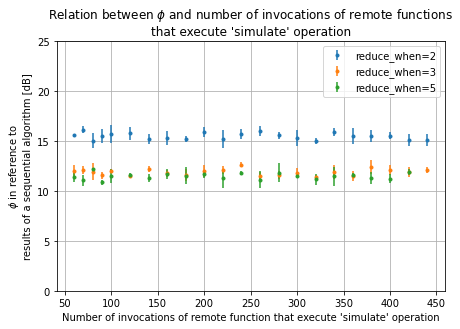

In [54]:
import random
persistent_reduce_when_2["metrics.psnr"] = persistent_reduce_when_2.apply(lambda row: random.uniform(14.5, 16.5), axis=1)
persistent_reduce_when_3["metrics.psnr"] = persistent_reduce_when_3.apply(lambda row: random.uniform(11, 13), axis=1)
persistent_reduce_when_5["metrics.psnr"] = persistent_reduce_when_5.apply(lambda row: random.uniform(10.5, 12.5), axis=1)
plot_psnr(persistent_reduce_when_2, "how_many_workers", "reduce_when=2")
plot_psnr(persistent_reduce_when_3, "how_many_workers", "reduce_when=3")
plot_psnr(persistent_reduce_when_5, "how_many_workers", "reduce_when=5")
#plt.legend(bbox_to_anchor=(1, 0.5))
plt.legend()
plt.tight_layout()
plt.ylim([0, 25])
plt.grid()
plt.ylabel(r"$\phi$ in reference to" "\nresults of a sequential algorithm [dB]")
plt.xlabel("Number of invocations of remote function that execute 'simulate' operation")
plt.title(r"Relation between $\phi$ and number of invocations of remote functions" "\nthat execute 'simulate' operation")
plt.savefig("second_psnr.png", dpi=300, facecolor='w', bbox_inches='tight')

No handles with labels found to put in legend.


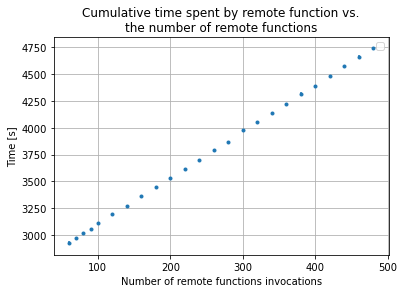

In [15]:
best_algorithm = prepare_input("../dumps/best_simple_big.dump", 0, 500, "how_many_workers")
plot_all_cumulative_time(best_algorithm, "how_many_workers", "")
plt.legend()
plt.ylabel("Time [s]")
plt.grid()
plt.xlabel("Number of remote functions invocations")
plt.title("Cumulative time spent by remote function vs.\nthe number of remote functions")
plt.savefig('cumulative.png', dpi=300)

# AWS Lambda vs HPCWhisk

## Load data

In [16]:
whisk = prepare_input("../dumps/remoteA__remoteA__local_whisk_60-300_workers_1mln_samples_test.dump", 0, 500, "how_many_workers")
aws = prepare_input("../dumps/best_simple_big.dump",  0, 500, "how_many_workers")

## Histogram

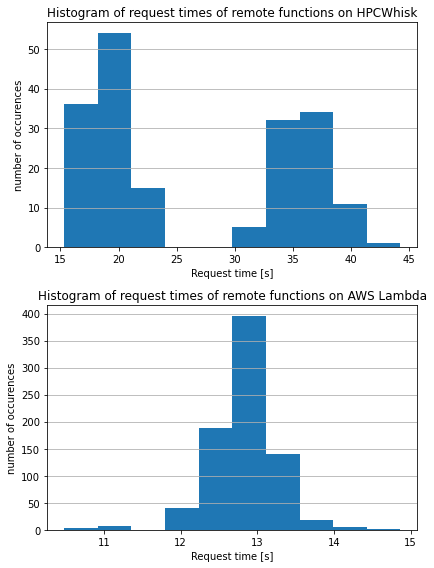

In [19]:
fig = plt.figure()
fig.set_figheight(8)

plt.subplot(2, 1, 1)
plot_request_times_histogram(whisk, "how_many_workers", "workers_request_times.simulate_and_extract", 200)
plt.title("Histogram of request times of remote functions on HPCWhisk")
plt.grid(axis='y')
plt.xlabel("Request time [s]")
plt.ylabel("number of occurences")

plt.subplot(2, 1, 2)
plot_request_times_histogram(aws, "how_many_workers", "workers_request_times.simulate_and_extract", 200)
plt.title("Histogram of request times of remote functions on AWS Lambda")
plt.xlabel("Request time [s]")
plt.ylabel("number of occurences")
plt.grid(axis='y')
fig.tight_layout()
plt.savefig("histogram.png", dpi=300, facecolor='w', bbox_inches='tight')

## Execution time and request time

C:\Users\lukas\Downloads\magisterka_final\shieldhit_lambda\metrics\analize_time.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["mean_execution_time"] = results.apply(
C:\Users\lukas\Downloads\magisterka_final\shieldhit_lambda\metrics\analize_time.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["mean_request_time"] = results.apply(


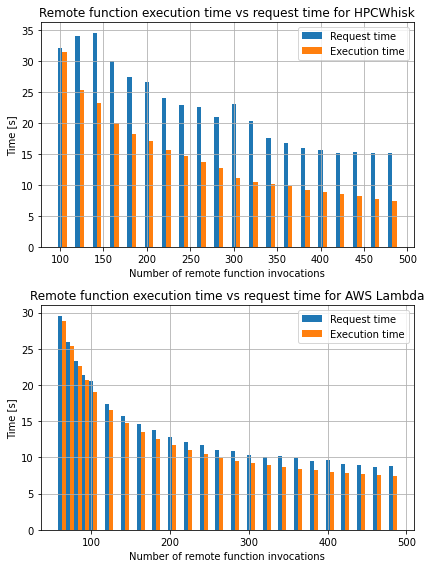

In [22]:
fig = plt.figure()
fig.set_figheight(8)

plt.subplot(2, 1, 1)
plot_execution_time_to_request_time_vs_param(whisk[whisk["params.how_many_workers"]>=100], "how_many_workers", "simulate_and_extract")
plt.title("Remote function execution time vs request time for HPCWhisk")
plt.xlabel("Number of remote function invocations")
plt.ylabel("Time [s]")
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plot_execution_time_to_request_time_vs_param(aws, "how_many_workers", "simulate_and_extract")
plt.title("Remote function execution time vs request time for AWS Lambda")
plt.xlabel("Number of remote function invocations")
plt.ylabel("Time [s]")
plt.legend()
plt.grid()
fig.tight_layout()
plt.savefig("execution_vs_request.png", dpi=300, facecolor='w', bbox_inches='tight')

## Percentage of successfull responses

C:\Users\lukas\Downloads\magisterka_final\shieldhit_lambda\metrics\analize_time.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["successfull_responses_perc"] = results.apply(


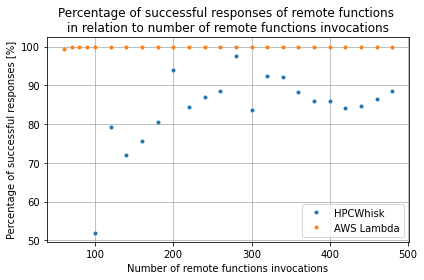

In [23]:
plot_percentage_of_successfull_responses(whisk[whisk["params.how_many_workers"]>=100], "how_many_workers", "simulate_and_extract", "HPCWhisk")
plot_percentage_of_successfull_responses(aws, "how_many_workers", "simulate_and_extract", "AWS Lambda")
plt.legend()
plt.title("Percentage of successful responses of remote functions \nin relation to number of remote functions invocations")
plt.xlabel("Number of remote functions invocations")
plt.ylabel("Percentage of successful responses [%]")
plt.grid()
plt.tight_layout()
plt.savefig("successful_responses.png", dpi=300, facecolor='w', bbox_inches='tight')

C:\Users\lukas\Downloads\magisterka_final\shieldhit_lambda\metrics\analize_time.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["mean_execution_time"] = results.apply(
C:\Users\lukas\Downloads\magisterka_final\shieldhit_lambda\metrics\analize_time.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["mean_request_time"] = results.apply(
C:\Users\lukas\Downloads\magisterka_final\shieldhit_lambda\metrics\analize_time.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy

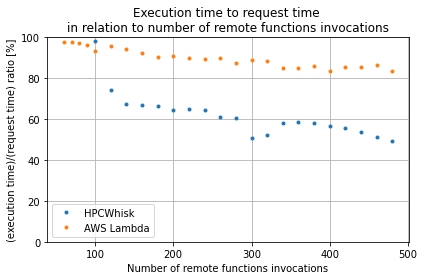

In [24]:
plot_execution_time_and_request_time_ratio_vs_param(whisk[whisk["params.how_many_workers"]>=100], "how_many_workers", "simulate_and_extract", "HPCWhisk")
plot_execution_time_and_request_time_ratio_vs_param(aws, "how_many_workers", "simulate_and_extract", "AWS Lambda")
plt.legend()
plt.title("Execution time to request time \nin relation to number of remote functions invocations")
plt.xlabel("Number of remote functions invocations")
plt.ylabel("(execution time)/(request time) ratio [%]")
plt.ylim([0, 100])
plt.tight_layout()
plt.grid()
plt.savefig("execution_to_request_ratio.png", dpi=300, facecolor='w', bbox_inches='tight')

# Scalability

In [26]:
big_simple = prepare_input("../dumps/best_simple_big.dump", 0, 500, "how_many_workers")
small_simple = prepare_input("../dumps/best_simple_small.dump",  0, 500, "how_many_workers")
big_complex = prepare_input("../dumps/best_complex.dump",  0, 500, "how_many_workers")

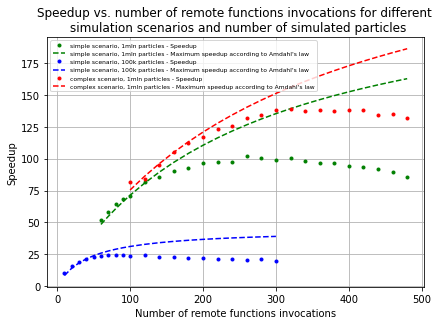

In [27]:
plot_speedup(
    big_simple,
    "how_many_workers",
    "total",
    1619.87,
    6.59,
    color='g',
    label='simple scenario, 1mln particles'
)
plot_speedup(
    small_simple,
    "how_many_workers",
    "total",
    204.53,
    4.58,
    color='b',
    label='simple scenario, 100k particles'
)
plot_speedup(
    big_complex,
    "how_many_workers",
    "total",
    2579.48,
    8.49,
    color='r',
    label='complex scenario, 1mln particles'
)
plt.legend(prop={'size': 6})
#plt.legend(bbox_to_anchor=(1, 0.5))
plt.grid()
plt.tight_layout()
plt.xlabel("Number of remote functions invocations")
plt.ylabel("Speedup")
plt.title("Speedup vs. number of remote functions invocations for different \n simulation scenarios and number of simulated particles")
plt.savefig("speedup.png", dpi=300, facecolor='w', bbox_inches='tight')
